In [3]:
import json
import numpy as np
from collections import Counter, OrderedDict
import pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import defaultdict
import csv
import geopandas as gpd
import pycountry
import pandas as pd
import mapclassify
import pycountry

## Authors (disambiguated)

In [2]:
# load data
path = ''
df = pd.read_csv(path + '23.Authors_disambiguated.csv', 
                      skiprows=range(1, 10), 
                      nrows=999999, # choose number of rows
                      encoding = 'utf8')

df['org#memberOf'] = df['org#memberOf'].fillna(0).astype(np.int64)
df.head(5)

,entity_id,class,rank,org#memberOf,foaf_name,paperCount,paperFamilyCount,citationCount
0,2609020272,Author,17399,28022161,A. A. A. A. Choudhary,1,1,145
1,2911027180,Author,21075,0,A. A. A. A. El Zorkani,1,1,0
2,891744734,Author,19819,0,A.A. A.A. Elchami,3,3,5
3,2493444721,Author,20332,1316054898,A.A. A.A. Gomes,2,2,3
4,2552922127,Author,21075,0,A. A. A. A. Hafeez,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   entity_id         999999 non-null  int64 
 1   class             999999 non-null  object
 2   rank              999999 non-null  int64 
 3   org#memberOf      999999 non-null  int64 
 4   foaf_name         999999 non-null  object
 5   paperCount        999999 non-null  int64 
 6   paperFamilyCount  999999 non-null  int64 
 7   citationCount     999999 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 61.0+ MB


### H-Index

In [4]:
# load data

path = ''
df = pd.read_csv(path + '33.Authors_disambiguated_hindex.txt', sep="\t", header=0, nrows=999999)
df

,author_id,citations,h_index_array,h_index_expert,hindex
0,2726120351,0,0,0,0
1,2621600318,0,0,0,0
2,2511487617,15,1,1,1
3,2547584944,4,1,1,1
4,2799999052,"0,0",0,0,0
...,...,...,...,...,...
999994,2718777060,"0,0,0,0",0,0,0
999995,2722306067,0,0,0,0
999996,2646024901,0,0,0,0
999997,2633069552,"0,0",0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   author_id       999999 non-null  int64 
 1   citations       999999 non-null  object
 2   h_index_array   999999 non-null  int64 
 3   h_index_expert  999999 non-null  int64 
 4   hindex          999999 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 38.1+ MB


#### Load all data

In [66]:
col_list = ['author_id','hindex']
path = ''
df = pd.read_csv(path + 'Authors_disambiguated_hindex.txt', sep="\t", header=0, usecols=col_list , nrows=50000)
#df['author_id'] = df['author_id'].apply(str)
df.head(5)

,author_id,hindex
0,2726120351,0
1,2621600318,0
2,2511487617,1
3,2547584944,1
4,2799999052,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author_id  50000 non-null  int64
 1   hindex     50000 non-null  int64
dtypes: int64(2)
memory usage: 781.4 KB


In [68]:
# max_value = df[hindex].max()
# min_value = df[hindex].min()
# avg_value = df[hindex].mean()
# median_value = df[hindex].median()
# higher_five = df['hindex'].nlargest(5)

df['hindex'].max(), df['hindex'].min(), df['hindex'].mean(), df['hindex'].median(), df['hindex'].nlargest(5)

(81,
 0,
 0.83492,
 0.0,
 28253    81
 1608     75
 10716    74
 37606    70
 34301    63
 Name: hindex, dtype: int64)

# Stocks

In [4]:
def generate_world():
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot()

    new_isoa3 = []
    for i, r in world.iterrows():
        if r['name'] == 'France':
            new_isoa3.append('FRA')
        elif r['name'] == 'Norway':
            new_isoa3.append('NOR')
        else:
            new_isoa3.append(r['iso_a3'])

    world['iso_3'] = new_isoa3
    del world['iso_a3']

    return world

In [6]:
interest_year = 2019 # customise
path = ''
df = pd.read_csv(path + '%s_stocks.csv' % interest_year)
df

,country,stock
0,US,15285
1,SA,696
2,AU,5021
3,NL,1349
4,TW,529
...,...,...
147,KG,1
148,MU,1
149,MG,1
150,TT,1


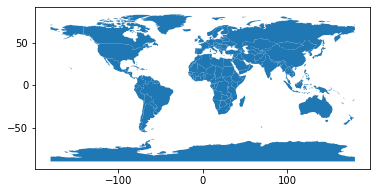

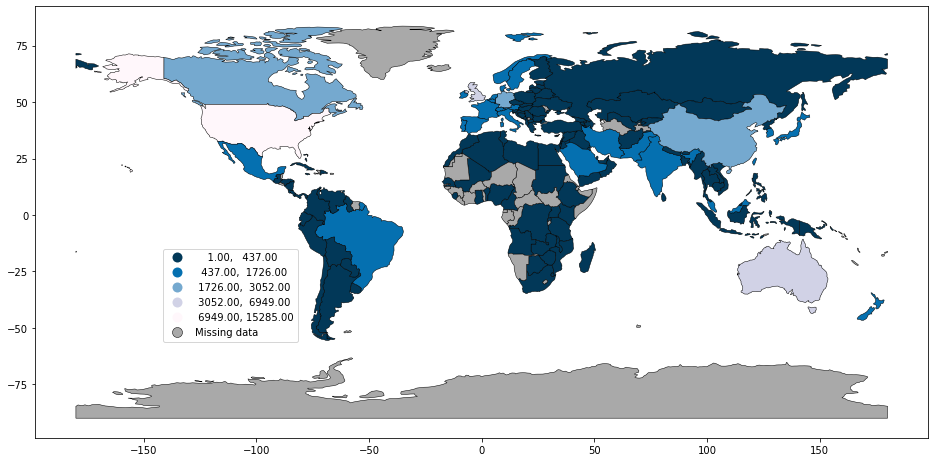

In [8]:
interest_year = 2019 # customise
path = ''
df0 = pd.read_csv(path + '%s_stocks.csv' % interest_year)

iso3_list = list()

for index, row in df0.iterrows():
    try: iso_a3 = pycountry.countries.get(alpha_2=row['country']).alpha_3
    except: iso_a3 = '-'
    iso3_list.append(iso_a3)

df0['iso_3'] = iso3_list
df0

world = generate_world()
worldmap = world.merge(df0, on='iso_3', how='left')

fig, ax = plt.subplots(figsize=(16,12))

worldmap.plot(column='stock', 
           cmap='PuBu_r',
           scheme='natural_breaks',
           ax=ax, 
           edgecolor="k", linewidth=.5,
           legend=True, 
           # legend_kwds={'orientation': "horizontal"},
           missing_kwds={"color": "darkgray", "label": "Missing data"}, #,"edgecolor": "red","hatch": "///","label": "Missing values",},)
          ) 

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.20, 0.25))
plt.rc('font', size=18)          # controls default text sizes


# plt.savefig('%s_stocks_map.png' % interest_year, bbox_inches='tight')


# Flows

In [22]:
df0 = pd.read_csv('29.CountryAnnualFlowsAggregated.csv')

df = df0[['country','out', 'in', 'ret', 'outNat', 'inNat']]
df

,country,out,in,ret,outNat,inNat
0,US,154568,163048,57248,88987,35259
1,GB,63254,63409,23911,38906,15840
2,IE,4800,4925,1660,2876,1059
3,CA,28269,27703,10025,17736,6819
4,BB,7,4,0,3,0
...,...,...,...,...,...,...
178,VC,0,1,0,0,0
179,AX,1,1,1,1,1
180,BI,1,1,0,0,0
181,GN,0,1,0,0,0


In [23]:
iso3_list = list()
for index, row in df.iterrows():
    try:
        isoa3 = pycountry.countries.get(alpha_2=row['country']).alpha_3
    except:
        isoa3 = '-'
    iso3_list.append(isoa3)

df['iso_3'] = iso3_list
df

<ipython-input-23-97ff81ca5fe0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iso_3'] = iso3_list


,country,out,in,ret,outNat,inNat,iso_3
0,US,154568,163048,57248,88987,35259,USA
1,GB,63254,63409,23911,38906,15840,GBR
2,IE,4800,4925,1660,2876,1059,IRL
3,CA,28269,27703,10025,17736,6819,CAN
4,BB,7,4,0,3,0,BRB
...,...,...,...,...,...,...,...
178,VC,0,1,0,0,0,VCT
179,AX,1,1,1,1,1,ALA
180,BI,1,1,0,0,0,BDI
181,GN,0,1,0,0,0,GIN


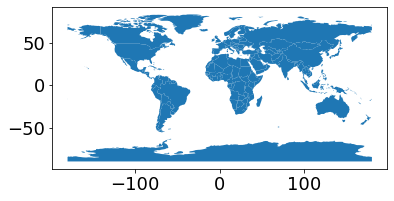

In [25]:
world = generate_world()
worldmap = world.merge(df, on='iso_3', how='left')


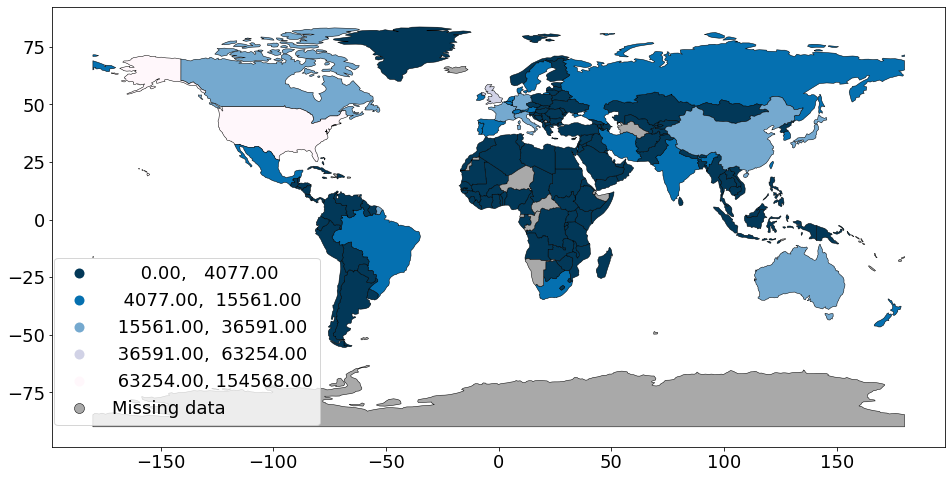

In [26]:
fig, ax = plt.subplots(figsize=(16,12))

worldmap.plot(column='out', 
           cmap='PuBu_r',
           scheme='natural_breaks',
           ax=ax, 
           edgecolor="k", linewidth=.5,
           legend=True, 
           # legend_kwds={'orientation': "horizontal"},
           missing_kwds={"color": "darkgray", "label": "Missing data"}, #,"edgecolor": "red","hatch": "///","label": "Missing values",},)
          ) 

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.11, 0.2, 0.20, 0.25))
plt.rc('font', size=18)          # controls default text sizes

#plt.savefig('flowsOut_map.png', bbox_inches='tight')



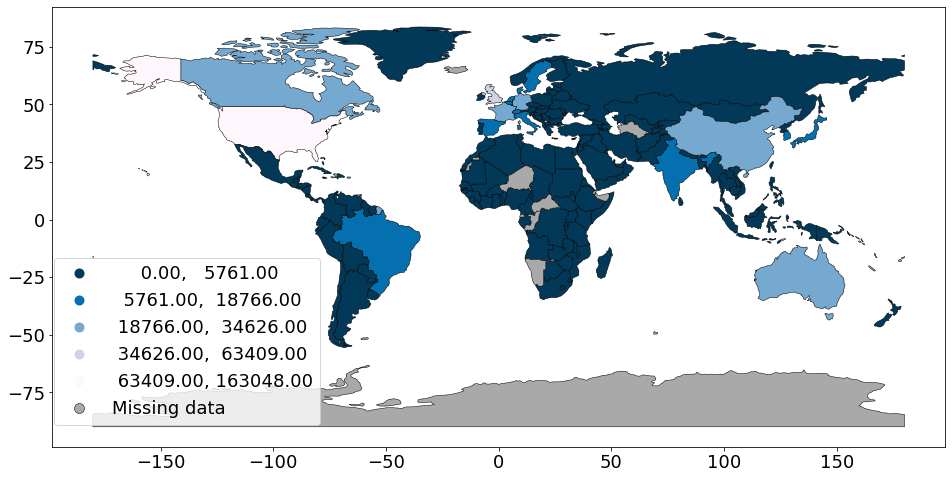

In [27]:
fig, ax = plt.subplots(figsize=(16,12))

worldmap.plot(column='in', 
           cmap='PuBu_r',
           scheme='natural_breaks',
           ax=ax, 
           edgecolor="k", linewidth=.5,
           legend=True, 
           # legend_kwds={'orientation': "horizontal"},
           missing_kwds={"color": "darkgray", "label": "Missing data"}, #,"edgecolor": "red","hatch": "///","label": "Missing values",},)
          ) 

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.11, 0.2, 0.20, 0.25))
plt.rc('font', size=18)          # controls default text sizes

# plt.savefig('flowsIn_map.png', bbox_inches='tight')


In [30]:
cols_out = [el for el in df0.columns if (el not in ['country', 'in', 'out', 'ret', 'outNat', 'inNat'] and el.split('_')[1] == 'out' )]
cols_out.append('country')

df_out = df0[cols_out]

for col in df_out.columns:
    df_out.rename(columns={col:col.replace('_out','')},inplace=True)

df_out.head()

/Users/laurapollacci/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,1857,1858,1862,1873,1874,1882,1896,1902,1905,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
0,1,0,0,0,0,0,1,1,0,0,...,9294,9886,10927,11006,10610,10350,9327,4232,186,US
1,0,1,1,0,0,0,0,0,0,1,...,4011,4237,4523,4530,4348,4441,3968,1735,104,GB
2,0,0,0,1,0,0,0,0,0,0,...,373,400,437,385,368,326,301,137,5,IE
3,0,0,0,1,0,0,0,0,0,0,...,1758,1834,2005,2016,1806,1832,1560,679,32,CA
4,0,0,0,0,1,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,BB


In [31]:
df_trend_out =  df_out.sum()
df_trend_out = df_trend_out.reset_index()
df_trend_out.columns = ['year', 'outbound']

# df_trend_out

In [32]:
cols_ret = [el for el in df0.columns if (el not in ['country', 'in', 'out', 'ret', 'outNat', 'inNat'] and el.split('_')[1] == 'ret')]
cols_ret.append('country')

df_ret = df0[cols_ret]

for col in df_ret.columns:
    df_ret.rename(columns={col:col.replace('_ret','')},inplace=True)
df_ret.head()


/Users/laurapollacci/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,1857,1858,1862,1873,1874,1882,1896,1902,1905,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
0,0,1,0,0,0,0,0,0,0,0,...,3291,3820,3900,4238,4293,4510,4123,2221,125,US
1,0,0,0,0,0,0,0,0,0,0,...,1340,1616,1621,1795,1936,1923,1886,1067,75,GB
2,0,0,0,0,0,1,0,0,0,0,...,101,134,132,149,133,149,145,73,6,IE
3,0,0,0,0,1,0,0,0,0,0,...,575,665,714,677,728,734,673,369,28,CA
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BB


In [34]:
df_trend_ret =  df_ret.sum()
df_trend_ret = df_trend_ret.reset_index()
df_trend_ret.columns = ['year', 'returners']

#df_trend_ret

In [35]:
trends = df_trend_out.merge(df_trend_ret, on='year', how='left')
trends

,year,outbound,returners
0,1857,1,0
1,1858,1,1
2,1862,1,0
3,1873,2,0
4,1874,1,1
...,...,...,...
101,2016,47336,19711
102,2017,47151,20337
103,2018,41848,19356
104,2019,18078,10314


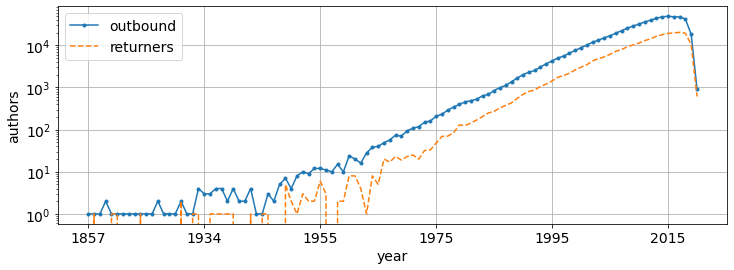

In [39]:
trends.plot('year',['outbound','returners'], 
            kind = 'line', 
            figsize=(12,4), 
            style=['.-', '--'], 
            logy=True,
            grid = True,
)

plt.xlabel('year')
plt.ylabel('authors')
plt.rc('font', size=14)          # controls default text sizes

#plt.savefig('flows_trend_total.png', bbox_inches='tight')

plt.show()

# Papers  

In [9]:
# load data
path = ''
df = pd.read_csv(path + '10.Papers.csv', 
                      skiprows=range(1, 10), 
                      nrows=999999, # choose number of rows
                      encoding = 'utf8')

#df['org#memberOf'] = df['org#memberOf'].fillna(0).astype(np.int64)
df.head(5)

,entity_id,class,entity_type,appearsInJournal,rank,estimatedCitationCount,referenceCount,appearsInConferenceSeries,familyId,appearsInConferenceInstance,citationCount,dcterms_created,dcterms_title,dcterms_publisher,prism_issueIdentifier,prism_startingPage,prism_volume,prism_endingPage,prism_publicationDate,dbo_publisher
0,6320,Paper,NaN,NaN,24657,0,1,NaN,NaN,NaN,0,2016-06-24,Fiberoptische Intubation — Wiederaufbereitung,NaN,NaN,351.0,NaN,355.0,2004-01-01,Springer_Science%2BBusiness_Media
1,7943,Paper,JournalArticle,2.754733e+09,29815,0,0,NaN,NaN,NaN,0,2016-06-24,[Simultaneous mammary gland epitheliomas in a ...,Bull Assoc Fr Etud Cancer,1.0,22.0,40.0,28.0,1953-01-01,NaN
2,8717,Paper,NaN,NaN,25749,0,0,NaN,NaN,NaN,0,2016-06-24,タイ国のサゴヤシ(Metroxylon spp.)のアイソザイム変異について,日本熱帯農業学会,4.0,229.0,39.0,235.0,1995-12-01,NaN
3,8772,Paper,NaN,NaN,24633,0,0,NaN,NaN,NaN,0,2016-06-24,Observations on a Montana water quality proposal.,Argonne National Laboratory,NaN,NaN,NaN,NaN,2006-01-12,NaN
4,9217,Paper,NaN,NaN,22275,11,0,NaN,NaN,NaN,11,2016-06-24,What's Wrong with Being Positive?,NaN,NaN,NaN,NaN,NaN,2009-11-13,Oxford_University_Press


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   entity_id                    999999 non-null  int64  
 1   class                        999999 non-null  object 
 2   entity_type                  528741 non-null  object 
 3   appearsInJournal             446641 non-null  float64
 4   rank                         999999 non-null  int64  
 5   estimatedCitationCount       999999 non-null  int64  
 6   referenceCount               999999 non-null  int64  
 7   appearsInConferenceSeries    24375 non-null   float64
 8   familyId                     11213 non-null   float64
 9   appearsInConferenceInstance  7996 non-null    float64
 10  citationCount                999999 non-null  int64  
 11  dcterms_created              999999 non-null  object 
 12  dcterms_title                999999 non-null  object 
 13 

# Affiliations

In [13]:
df = pd.read_csv('01.AffiliationsGeo.csv')
df.head()

,entity_id,class,foaf_name,foundation_date,type_entities,acronym,pos#lat,pos#long,city_name,city_lat,city_lon,state_name,postcode,country_name,country_alpha2,country_alpha3,country_official_name,country_2
0,4605,Affiliation,Illinois College of Optometry,1941.0,NaN,NaN,41.835740,-87.623410,Cook County,NaN,NaN,Illinois,60616,United States,US,USA,United States of America,NaN
1,9507,Affiliation,Sangji University,1974.0,NaN,NaN,37.369946,127.928612,Wonju,NaN,NaN,Gangwon-do,NaN,"Korea, Republic of",KR,KOR,NaN,NaN
2,15855,Affiliation,Manchester Institute of Innovation Research,NaN,NaN,NaN,53.468000,-2.236000,North West England,NaN,NaN,England,M15 6PB,United Kingdom,GB,GBR,United Kingdom of Great Britain and Northern I...,NaN
3,19722,Affiliation,Ateneo de Manila University,1859.0,NaN,NaN,14.638890,121.077782,Eastern Manila District,NaN,NaN,Metro Manila,1108,Philippines,PH,PHL,Republic of the Philippines,NaN
4,41870,Affiliation,Instituto Militar de Engenharia,1792.0,NaN,NaN,-22.955889,-43.166138,Rio de Janeiro,-22.911014,-43.209373,Rio de Janeiro,NaN,Brazil,BR,BRA,Federative Republic of Brazil,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25767 entries, 0 to 25766
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity_id              25767 non-null  int64  
 1   class                  25767 non-null  object 
 2   foaf_name              25767 non-null  object 
 3   foundation_date        14417 non-null  float64
 4   type_entities          2578 non-null   object 
 5   acronym                24 non-null     object 
 6   pos#lat                24762 non-null  float64
 7   pos#long               24762 non-null  float64
 8   city_name              24813 non-null  object 
 9   city_lat               2368 non-null   float64
 10  city_lon               2368 non-null   float64
 11  state_name             24738 non-null  object 
 12  postcode               16907 non-null  object 
 13  country_name           24864 non-null  object 
 14  country_alpha2         24863 non-null  object 
 15  co

In [15]:
# empty values
df_counts = df.isna().sum()
df_counts

entity_id                    0
class                        0
foaf_name                    0
foundation_date          11350
type_entities            23189
acronym                  25743
pos#lat                   1005
pos#long                  1005
city_name                  954
city_lat                 23399
city_lon                 23399
state_name                1029
postcode                  8860
country_name               903
country_alpha2             904
country_alpha3             903
country_official_name     3126
country_2                25637
dtype: int64

<AxesSubplot:>

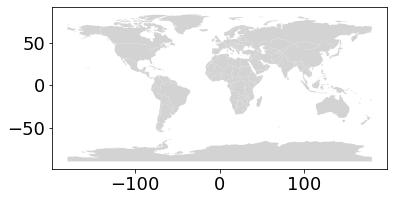

In [16]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey")

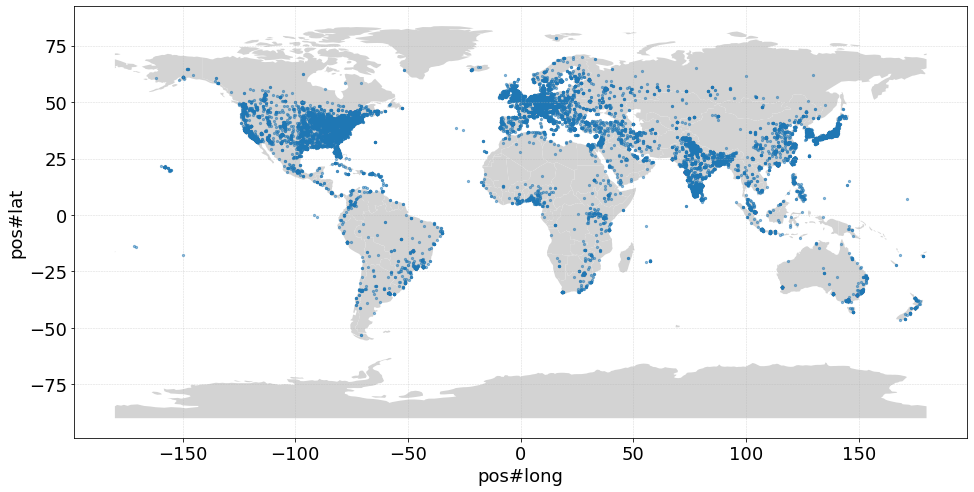

In [17]:
# initialize an axis
fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey",ax=ax)
df.plot(x="pos#long", y="pos#lat", kind="scatter", cmap="YlOrRd", marker='.', alpha=0.5, ax=ax)# add grid
ax.grid(b=True, alpha=0.5, linestyle='--', linewidth=.5)

plt.rc('font', size=18)          # controls default text sizes

#plt.savefig('affiliation_location_scatter.png', bbox_inches='tight')

plt.show()

In [18]:
# handle country names

wdata = df.groupby(['country_name'])['entity_id'].count()
wdata = wdata.reset_index()
names = []
usa_n, usa_i = 0, ''
for i,r in wdata.iterrows():
        
    # print(r['country_name'])
    if r['country_name'] == 'United States':
        names.append('United States of America')
        usa_n, usa_i = r['entity_id'], i
    elif r['country_name'] == 'Venezuela, Bolivarian Republic of' :
        names.append('Venezuela')
    elif r['country_name'] == 'Bolivia, Plurinational State of' :
        names.append('Bolivia')
    elif r['country_name'] == 'Congo, The Democratic Republic of the' :
        names.append('Dem. Rep. Congo')
    elif r['country_name'] == 'South Sudan' :
        names.append('S. Sudan')
    elif r['country_name'] == 'Tanzania, United Republic of' :
        names.append('Tanzania')
    elif r['country_name'] == 'Viet Nam' :
        names.append('Vietnam')
    elif r['country_name'] == "Lao People's Democratic Republic" :
        names.append('Laos')
    elif r['country_name'] == "Korea, Republic of" :
        names.append('South Korea')
    elif r['country_name'] == "Korea, Democratic People's Republic of" :
        names.append('North Korea')
    elif r['country_name'] == "Syrian Arab Republic" :
        names.append('Syria')
    elif r['country_name'] == "Bosnia and Herzegovina" :
        names.append('Bosnia and Herz.')
    elif r['country_name'] == "North Macedonia" :
        names.append('Macedonia')
    elif r['country_name'] == "Moldova, Republic of" :
        names.append('Moldova')
    elif r['country_name'] == "Dominican Republic" :
        names.append('Dominican Rep.')
    else:
        names.append(r['country_name'])
wdata['name'] = names
del wdata['country_name']

d1 = {'name': 'Puerto Rico','entity_id': 29}
wdata = wdata.append(d1, ignore_index = True)
wdata.at[usa_i,'entity_id']=usa_n-29

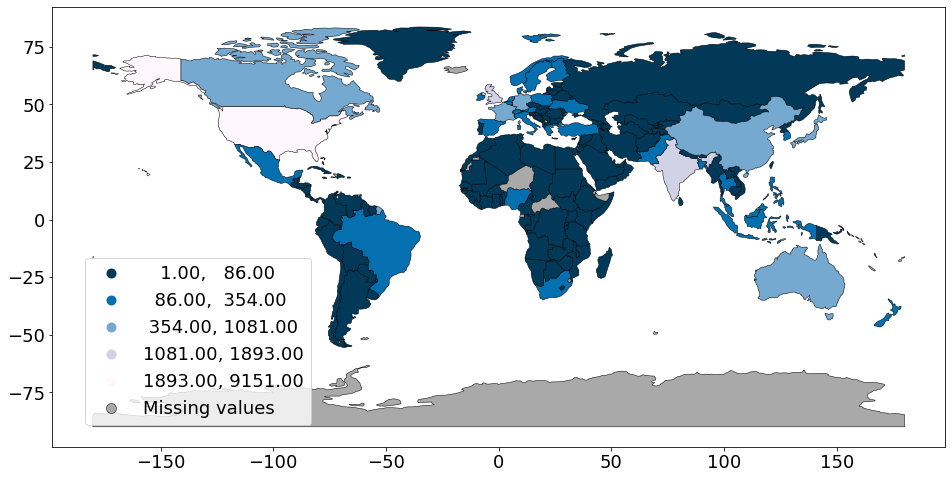

In [19]:
fig, ax = plt.subplots(figsize=(16,12))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(wdata, on='name', how='left')
world.plot(column='entity_id', 
           cmap='PuBu_r',
           scheme='natural_breaks',
           ax=ax, 
           edgecolor="k", linewidth=.5,
           legend=True, 
           # legend_kwds={'label': 'Number of institutions','orientation': "horizontal"},
           missing_kwds={"color": "darkgray", "label": "Missing values"}, #,"edgecolor": "red","hatch": "///","label": "Missing values",},)
          ) 
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.20, 0.25))
plt.rc('font', size=18)          # controls default text sizes

#plt.savefig('affiliation_countries.png', bbox_inches='tight')


# Fields of Study

In [20]:
path_fos = '22.FieldOfStudyLabeled.csv'
df = pd.read_csv(path_fos)
df.head()

,entity_id,fos_list
0,95457728,History:1.0
1,127313418,Geology:1.0
2,162324750,Economics:1.0
3,205649164,Geography:1.0
4,185592680,Chemistry:1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740460 entries, 0 to 740459
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   entity_id  740460 non-null  int64 
 1   fos_list   740460 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.3+ MB
